# 3.1 Tratando a variável dependente (Y)

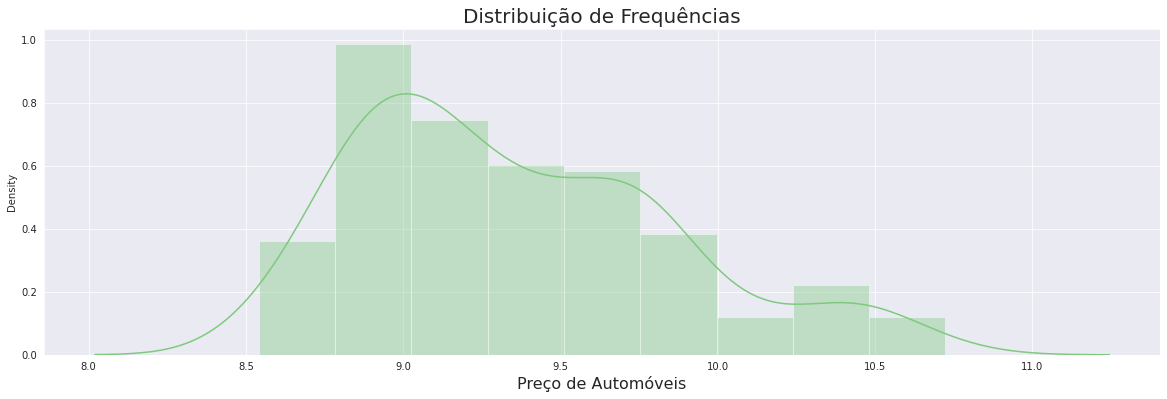

In [4]:
y = np.log(dados['price'])

ax = sns.distplot(y)
ax.figure.set_size_inches(20, 6)
ax.set_title('Distribuição de Frequências', fontsize=20)
ax.set_xlabel('Preço de Automóveis', fontsize=16)
ax;

## 3.2 Tratando a variáveis explicativas (X)

In [5]:
columns = [ 'symboling', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']

In [6]:
X = dados[columns]
X.set_index(dados['car_ID'], inplace=True)

In [7]:
X.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27
2,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27
3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26
4,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30
5,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22


In [8]:
X.dtypes

symboling             int64
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
dtype: object

## Convertendo as variáveis alfanuméricas para numéricas

In [9]:
# Label Encoder

columns = ['fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation',
           'enginetype','cylindernumber','fuelsystem',]

label_encoder = LabelEncoder()

for column in columns:
    X[column] = label_encoder.fit_transform(X[column])

In [10]:
X.head(3)

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3,1,0,1,0,2,0,88.6,168.8,64.1,...,2,130,5,3.47,2.68,9.0,111,5000,21,27
2,3,1,0,1,0,2,0,88.6,168.8,64.1,...,2,130,5,3.47,2.68,9.0,111,5000,21,27
3,1,1,0,1,2,2,0,94.5,171.2,65.5,...,3,152,5,2.68,3.47,9.0,154,5000,19,26


In [11]:
X.dtypes

symboling             int64
fueltype              int64
aspiration            int64
doornumber            int64
carbody               int64
drivewheel            int64
enginelocation        int64
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype            int64
cylindernumber        int64
enginesize            int64
fuelsystem            int64
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
dtype: object

## Tratando a variavel symboling
<p> A variável symboling nos diz sobre a segurança de um automóvel que pode variar de -3 a 3, entretanto esses valores negativos podem atrapalhar a construção do modelo, portanto irei altera-lá para variar de 0 a 6</p>

In [12]:
X['symboling'] = X['symboling'].astype(str)
X['symboling'] = X['symboling'].str.replace('-3','0')
X['symboling'] = X['symboling'].str.replace('-2','1')
X['symboling'] = X['symboling'].str.replace('-1','2')
X['symboling'] = X['symboling'].str.replace('0','3')
X['symboling'] = X['symboling'].str.replace('1','4')
X['symboling'] = X['symboling'].str.replace('2','5')
X['symboling'] = X['symboling'].str.replace('3','6')
X['symboling'] = X['symboling'].astype(int)

In [13]:
for column_name in X.columns:
    column = X[column_name]
    if ((column == 0).sum()) >0:
        X[column_name] = np.log(X[column_name]+1)
    else:
        X[column_name] = np.log(X[column_name])

## Identificando as variáveis explicativas com correlação maior ou igual a 0.3

In [15]:
X2 = X.copy()

In [16]:
X2['price'] = y

In [17]:
columns = X2.corr().round(2).loc['price'].index
values = X2.corr().round(2).loc['price'].values

correlacao = pd.DataFrame(values, columns, columns=['Correlação'])
correlacao=correlacao[correlacao['Correlação']>=0.3]

Aqui escolhir uma correlação de >=0.3 para entrar no modelo, assim encontrando 11 variáveis com maior importancia para explicar os valores

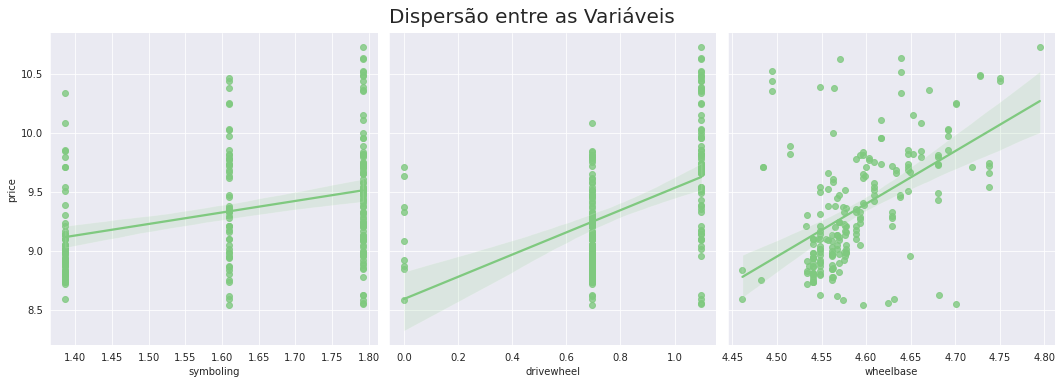

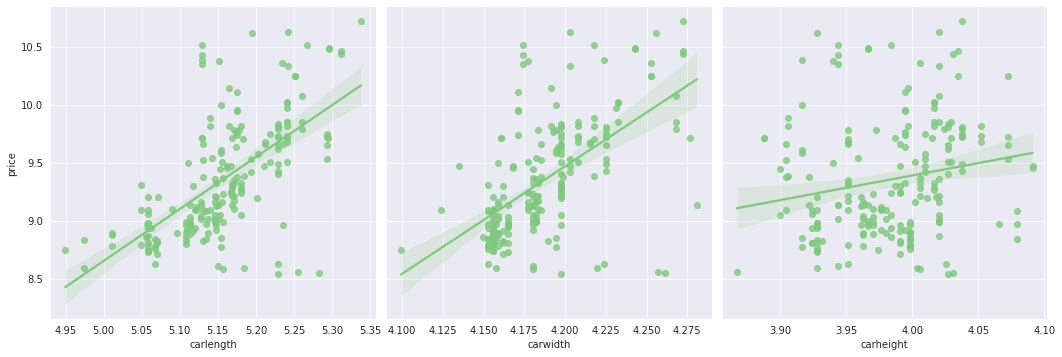

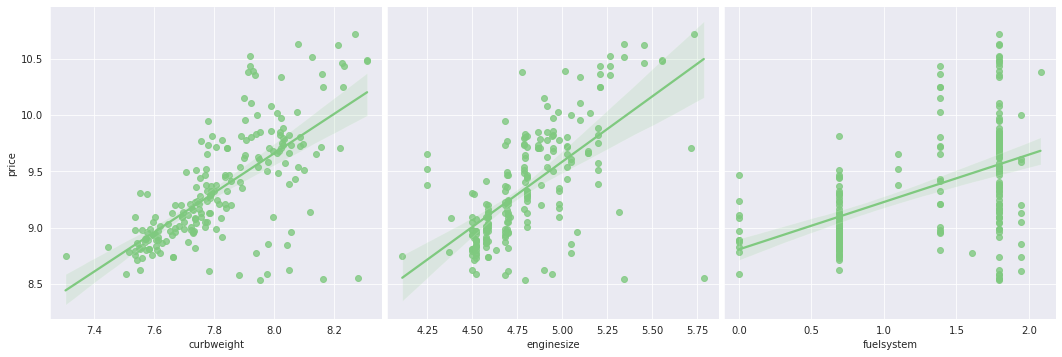

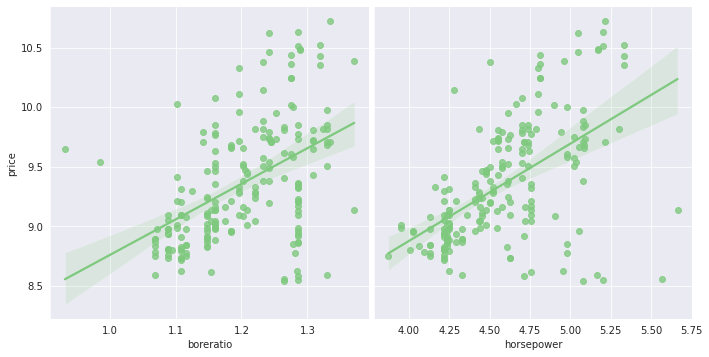

In [18]:
ax = sns.pairplot(X2, y_vars='price',x_vars = ['symboling','drivewheel','wheelbase'], height=5, kind='reg')
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.05)
ax;

ax = sns.pairplot(X2, y_vars='price',x_vars = ['carlength','carwidth','carheight'], height=5, kind='reg')
ax

ax = sns.pairplot(X2, y_vars='price',x_vars = ['curbweight','enginesize','fuelsystem'], height=5, kind='reg')
ax

ax = sns.pairplot(X2, y_vars='price',x_vars = ['boreratio','horsepower'], height=5, kind='reg')
ax